<a href="https://colab.research.google.com/github/amantiwari1/Notebook_List/blob/master/Web_Scrabing_in_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from scrapy import Selector

data = requests.get("https://www.worldometers.info/coronavirus/").content
sel = Selector(text = data)
num_of_case = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr > td:nth-child(2)::text").extract()
name_of_con = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr >  td:nth-child(1) ::text").extract()
X = list(num_of_case)
y = list(name_of_con)

In [0]:
X = list(num_of_case)
y = list(name_of_con)

In [0]:
import pandas as pd

df = pd.DataFrame(X,columns=["Confirmed_Case"])

In [0]:
df["Country"] = y

In [0]:
df = df[["Country","Confirmed_Case"]]

In [0]:
df["Confirmed_Case"] = df["Confirmed_Case"].str.replace(",","").astype("int64")

In [0]:
df = df.sort_values(by="Confirmed_Case", ascending=False)

In [8]:
df.head()

,Country,Confirmed_Case
0,USA,141169
1,Italy,97689
200,China,81439
2,Spain,80110
3,Germany,62095


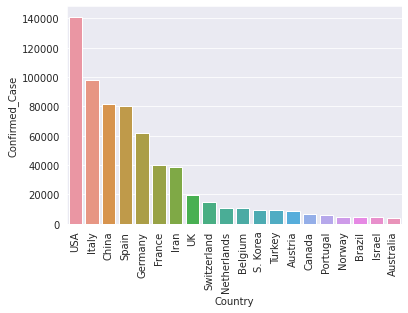

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style(style = "darkgrid")

g = sns.barplot(x="Country", y="Confirmed_Case", data = df[:20])
g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)
plt.show()
